# Multiple Linear Regression model 
    Import Libraries
    Load the Dataset
    Prepare the Data
    Split the Data
    Train the Model
    Evaluate the Model


In [36]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


    pandas: For data manipulation and analysis.
    numpy: For numerical computations.
    sklearn.model_selection.train_test_split: For splitting the dataset into training and testing sets.
    sklearn.linear_model.LinearRegression: For creating and training the linear regression model.
    sklearn.metrics: For evaluating the model's performance.
    matplotlib.pyplot: For creating visualizations.
    seaborn: For creating more attractive visualizations (optional but useful).

# Step 2 : Problem Statement:
#### Objective
    The goal is to develop a multiple linear regression model to predict the petal width of an Iris flower based on its sepal length, sepal width, and petal length.

#### Dataset Description

    The Iris dataset consists of 150 samples from three species of Iris flowers (Iris-setosa, Iris-versicolor, and Iris-virginica). Each sample contains the following features:

    Id: Unique identifier for each sample
    SepalLengthCm: Sepal length in centimeters
    SepalWidthCm: Sepal width in centimeters
    PetalLengthCm: Petal length in centimeters
    PetalWidthCm: Petal width in centimeters
    Species: Species of the Iris flower
    Features (Independent Variables)
    SepalLengthCm
    SepalWidthCm
    PetalLengthCm
    Target (Dependent Variable)
    PetalWidthCm
### Problem
    Develop a multiple linear regression model using the features (SepalLengthCm, SepalWidthCm, PetalLengthCm) to predict the target variable (PetalWidthCm). Evaluate the model's performance using appropriate metrics and visualize the results.

# Step 3: Load the Dataset:
    Load the Iris dataset into a pandas DataFrame. 


In [2]:
import pandas as pd
data=pd.read_csv('iris.csv')
display(data)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [3]:
import seaborn as sns

# Load the Iris dataset
data = sns.load_dataset('iris')

# Display the first few rows of the dataset
print(data.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


# Step 4: Data Accessing and Cleaning
    Load the Dataset
    Inspect the Data
    Handle Missing Values
    Encode Categorical Variables (if necessary)
    Check for Multicollinearity



In [4]:
# Display the first few rows of the dataset
display(data.head())

# Display the summary statistics of the dataset
display(data.describe())

# Display the data types of the columns
display(data.info())


sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

##### Inspect the Data 
    Check the first few rows, summary statistics, and data types to understand the structure of the dataset.
    1.Dirty Data :
            Bad Quality Issue
            - Duplicated Data 
            - Missing Data
            - Corrupt Data
            - Inaccurate Data
            
        2. Messy Data (Data With the tidiness Issue)
            Structural issue 
            - Each variables forms a columns
            - Each obeservation forms a row.
            - Each Observation unit form a table 
-------------- 

       Dirty Data:
            Duplicated Data
            Missing Data
            Corrupt Data
            Inaccurate Data
       
       Messy Data (Tidiness Issues):
            Each variable forms a column
            Each observation forms a row
            Each observation unit forms a table


# Dirty Data:
## Duplicated Data

In [5]:
# Duplicated Data: Check if there are any duplicate rows in the dataset.
# Check for duplicate rows
duplicate_rows = data.duplicated()
display('duplicate_rows = ',data[data.duplicated()])
display(f"Number of duplicate rows: {duplicate_rows.sum()}")


'duplicate_rows = '

sepal_length  sepal_width  petal_length  petal_width    species
142           5.8          2.7           5.1          1.9  virginica

'Number of duplicate rows: 1'

## Missing Data: 
    Check for any missing values in the dataset.

In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


## corrupt data

In [7]:

def check_corrupt_data(data):
    """
    Corrupt data can include invalid or nonsensical values.
    In the Iris dataset, the typical values for sepal and 
    petal dimensions should be within reasonable ranges.
    Check for any values that fall outside expected ranges.

    Check if the values fall within expected ranges. 
    For the Iris dataset, reasonable ranges might be:

    SepalLengthCm: 0 to 10 cm
    SepalWidthCm: 0 to 10 cm
    PetalLengthCm: 0 to 10 cm
    PetalWidthCm: 0 to 10 cm
    """
    
    # Check for corrupt data by looking at summary statistics
    print("Summary statistics:\n", data.describe())

    # Specific checks (e.g., negative values, extremely high values)
    print("SepalLengthCm outliers:\n",
          data[(data['sepal_length'] < 0) | (data['sepal_length'] > 10)])
    print("SepalWidthCm outliers:\n", 
          data[(data['sepal_width'] < 0) | (data['sepal_width'] > 10)])
    print("PetalLengthCm outliers:\n", 
          data[(data['petal_length'] < 0) | (data['petal_length'] > 10)])
    print("PetalWidthCm outliers:\n", 
          data[(data['petal_width'] < 0) | (data['petal_width'] > 10)])

# Use the function to check for corrupt data
check_corrupt_data(data)


Summary statistics:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
SepalLengthCm outliers:
 Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []
SepalWidthCm outliers:
 Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []
PetalLengthCm outliers:
 Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []
PetalWidthCm outliers:
 Empty DataFrame
Columns: [sepal_length, sepa

In [8]:
# Print the module docstring
print(__doc__)

# Print the function docstring
print(check_corrupt_data.__doc__)

Automatically created module for IPython interactive environment

    Corrupt data can include invalid or nonsensical values.
    In the Iris dataset, the typical values for sepal and petal dimensions should be within reasonable ranges.
    Check for any values that fall outside expected ranges.

    Check if the values fall within expected ranges. For the Iris dataset, reasonable ranges might be:

    SepalLengthCm: 0 to 10 cm
    SepalWidthCm: 0 to 10 cm
    PetalLengthCm: 0 to 10 cm
    PetalWidthCm: 0 to 10 cm
    


## Inaccurate Data:
    Inaccurate data is more challenging to detect without domain knowledge. However, you can look for inconsistencies or outliers that seem implausible.

In [17]:
import warnings
warnings.filterwarnings("ignore")

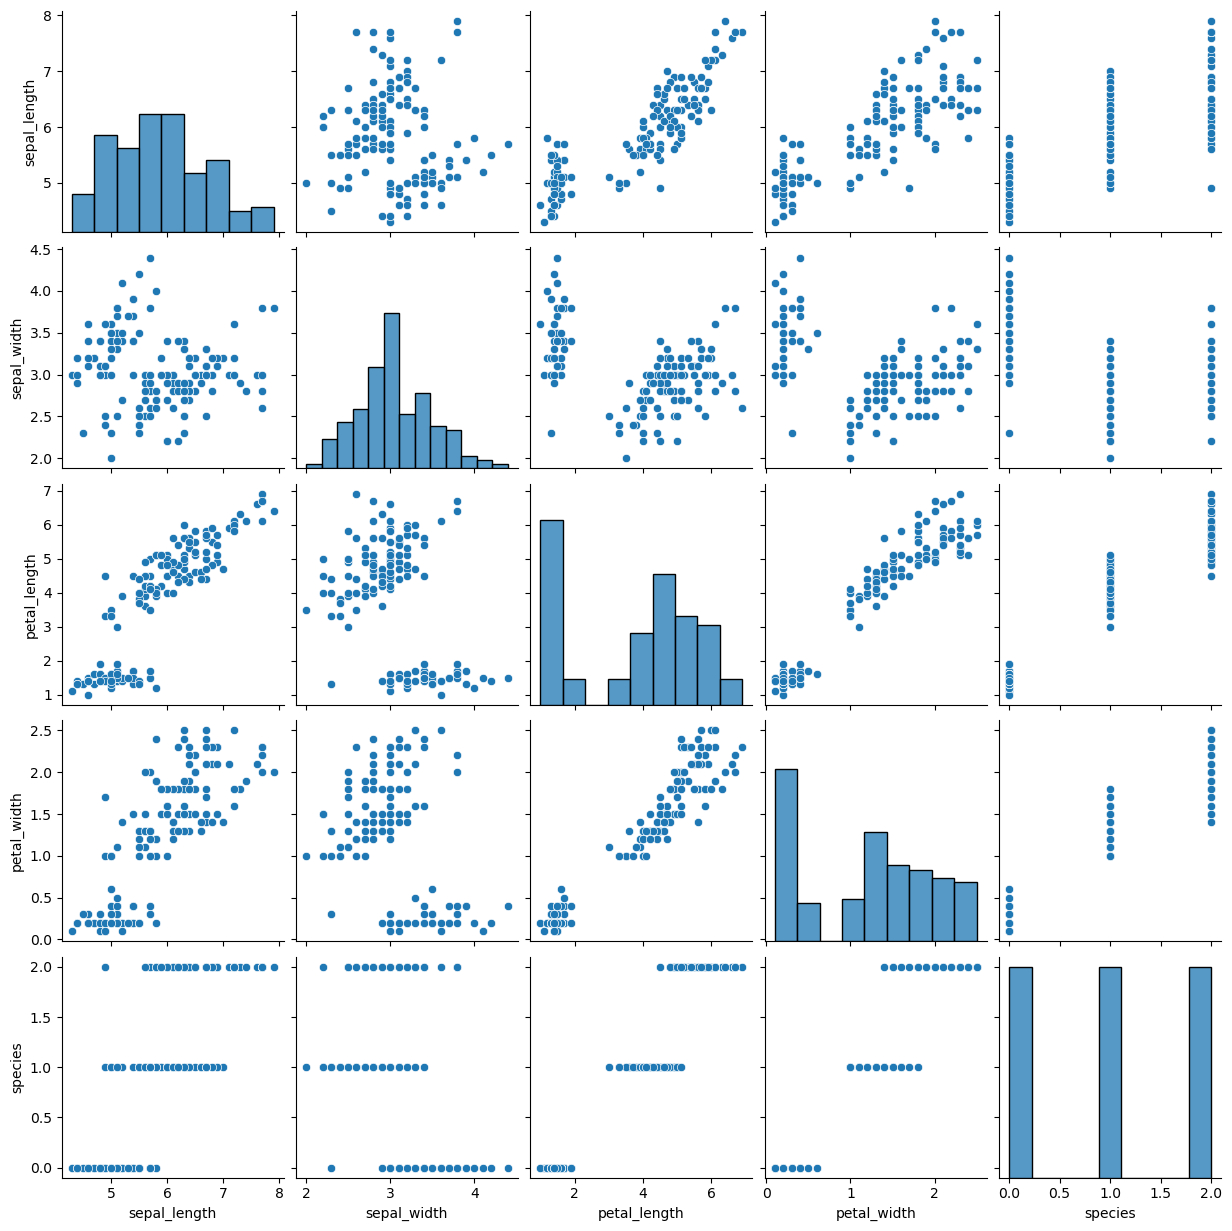

In [18]:
# Visual check for inaccuracies using plots
sns.pairplot(data)
plt.show()


In [10]:
import warnings
warnings.filterwarnings("ignore")

## Handling Corrupt Data
    Once corrupt data is identified, it can be handled in several ways:

    Removing Outliers: If the corrupt data points are few, they can be removed.
    Imputation: Replace corrupt values with a statistical measure like mean, median, or mode.
    Correction: If there is a way to correct the corrupt data based on domain knowledge, apply the corrections.

# Check for Messy Data (Tidiness Issues):
    Ensure the dataset follows the tidy data principles:

    Each variable forms a column.
    Each observation forms a row.
    Each observational unit forms a table.
    and data type checking. Steps to Convert species Column to Integer Ordinal Numbers

In [11]:
# Check the structure of the dataset
display(data.head())

# Check the columns and their data types
display(data.info())


sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

    To address the structural issue in the Iris dataset where the species column is an object (categorical) type, we can convert the unique content into integer ordinal numbers. This will help in creating a clean and well-structured dataset suitable for numerical analysis and modeling.

In [12]:
def convert_species_to_ordinal(data):
    """
    Convert the species column to integer ordinal numbers.
    """
    # Identify unique species
    species_unique = data['species'].unique()
    # Create a mapping from species to integers
    species_mapping = {species: idx for idx, species in enumerate(species_unique)}
    # Apply the mapping
    data['species'] = data['species'].map(species_mapping)
    print("Species column after conversion:\n", data['species'].head())
    return data

In [13]:
# Convert the species column to integer ordinal numbers
data = convert_species_to_ordinal(data)
display(data)
# Print the function docstrings

print(convert_species_to_ordinal.__doc__)

Species column after conversion:
 0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64


sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


    Convert the species column to integer ordinal numbers.
    


In [14]:
data['species'].unique()

array([0, 1, 2])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# EDA :
    Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that helps to summarize the main characteristics of the dataset, often with visual methods. Here is a detailed step-by-step process for performing EDA on the Iris dataset:



    Steps for Exploratory Data Analysis (EDA)
    Understand the Structure: Display basic information about the dataset.
    Summary Statistics: Generate descriptive statistics.
    Check for Missing Values: Identify any missing data.
    Visualize the Data: Use various plots to understand the distribution and relationships between variables.
    Check for Outliers: Identify any potential outliers in the data.
    Correlations: Calculate and visualize correlations between numerical variables.
    Transform Categorical 
    
----------------

    To conduct a thorough Exploratory Data Analysis (EDA) on the Iris dataset, we can follow the structure of univariate, bivariate, and multivariate analysis. Here’s how to do it step by step:

    1. Univariate Analysis
    Univariate analysis involves analyzing the distribution and summary statistics of each variable independently.

    2. Bivariate Analysis
    Bivariate analysis involves examining the relationship between two variables.

    3. Multivariate Analysis
    Multivariate analysis involves examining the relationships between more than two variables simultaneously.

Summary Statistics:
        sepal_length  sepal_width  petal_length  petal_width     species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


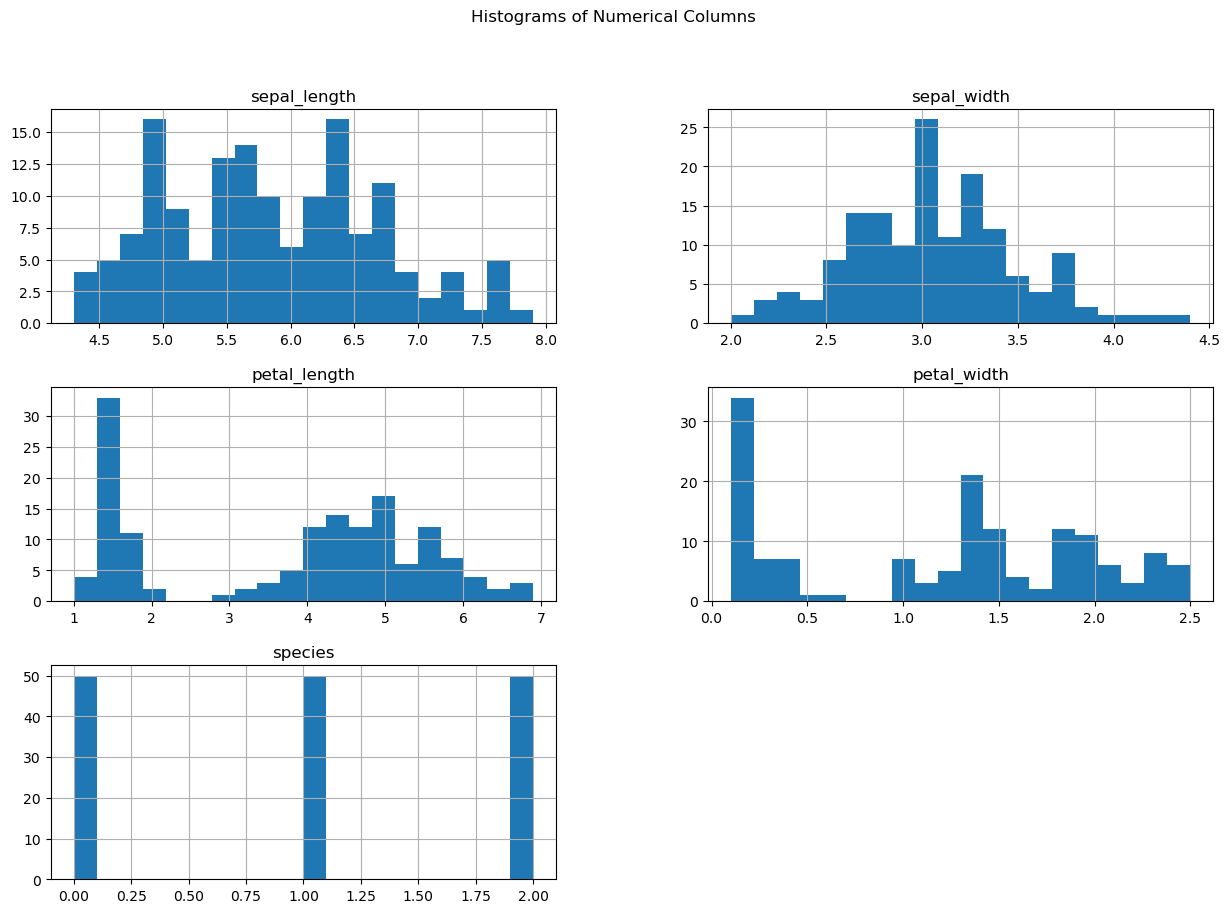

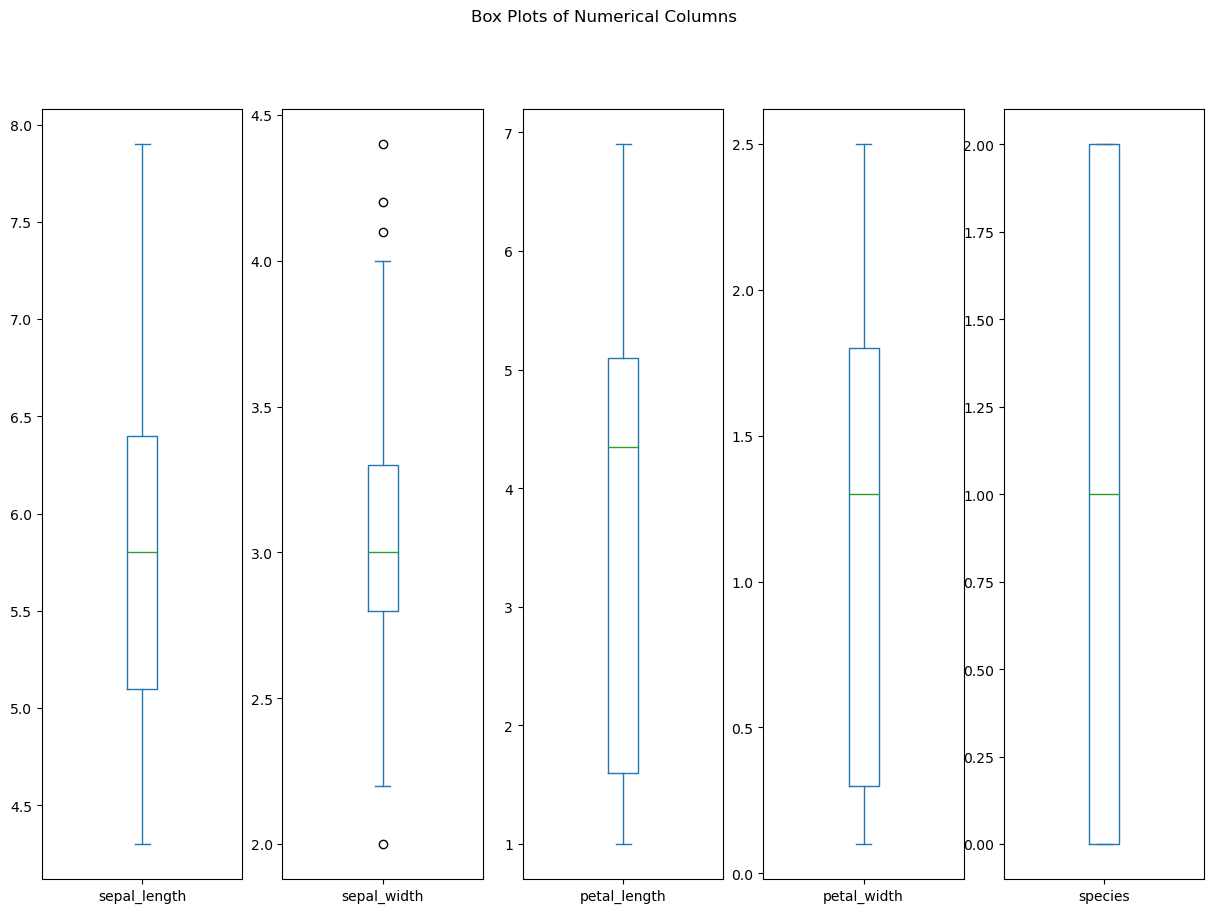

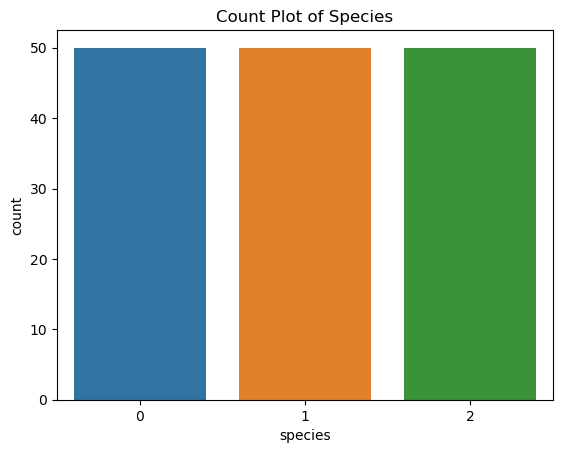

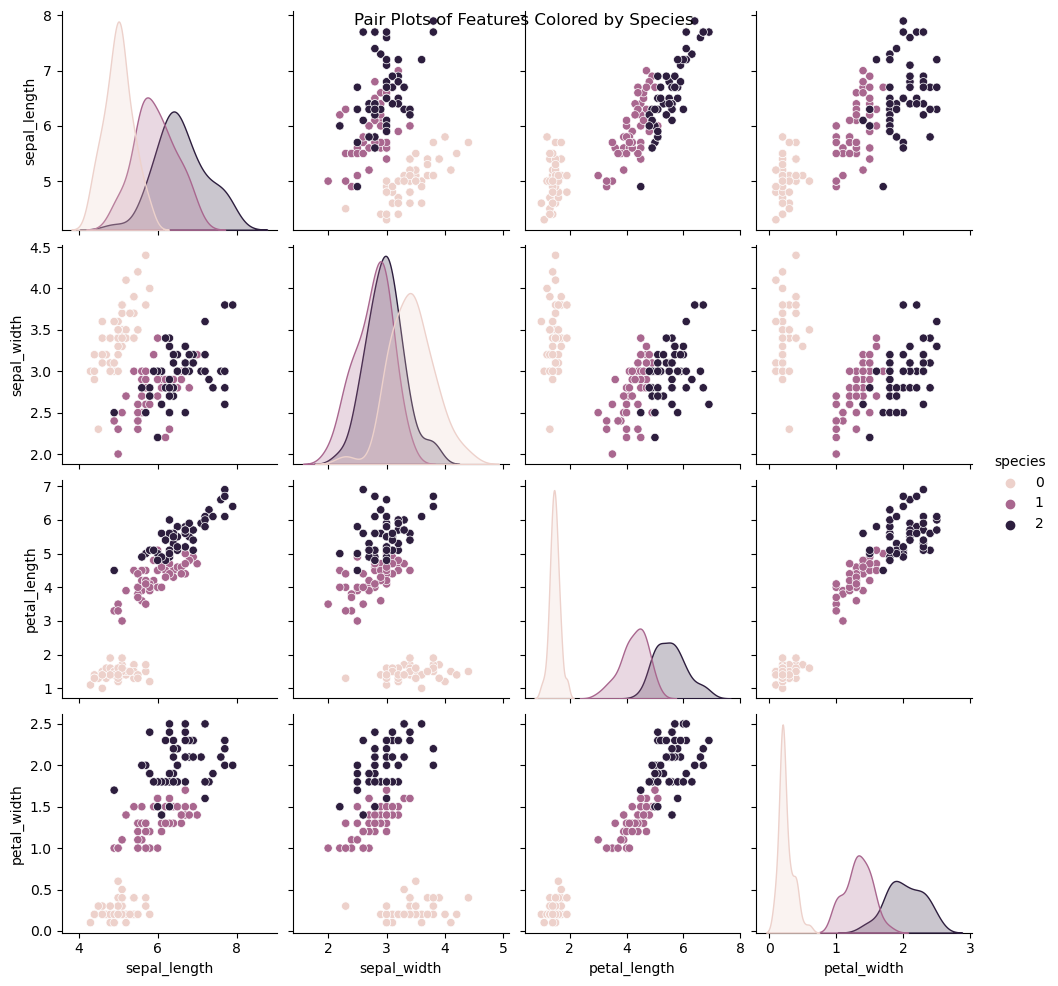

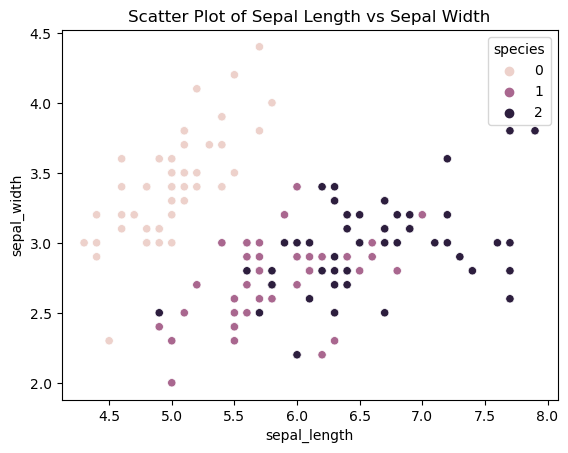

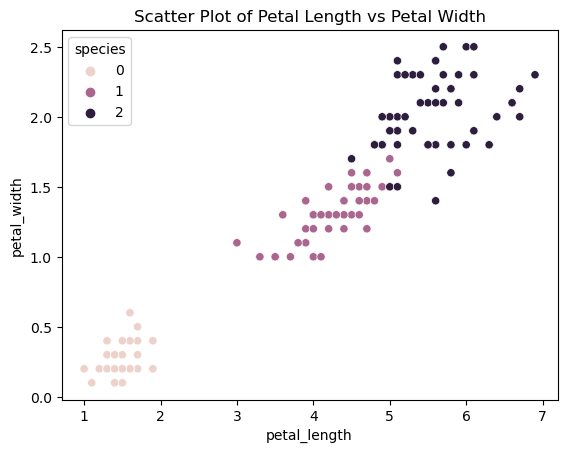

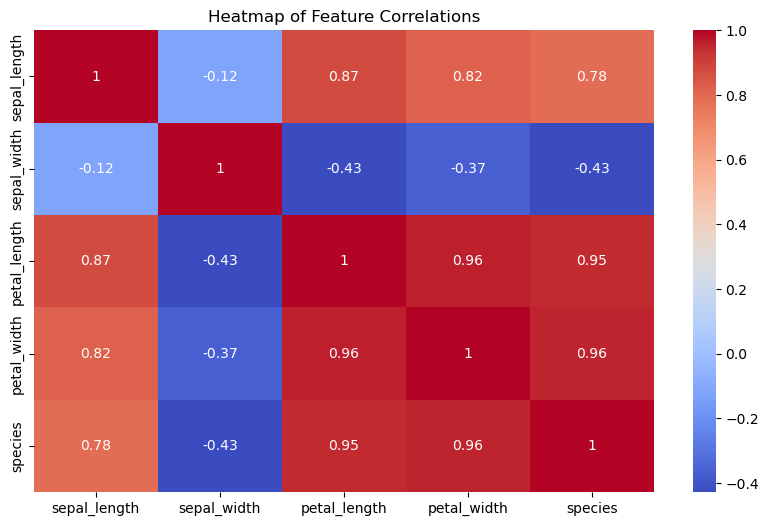

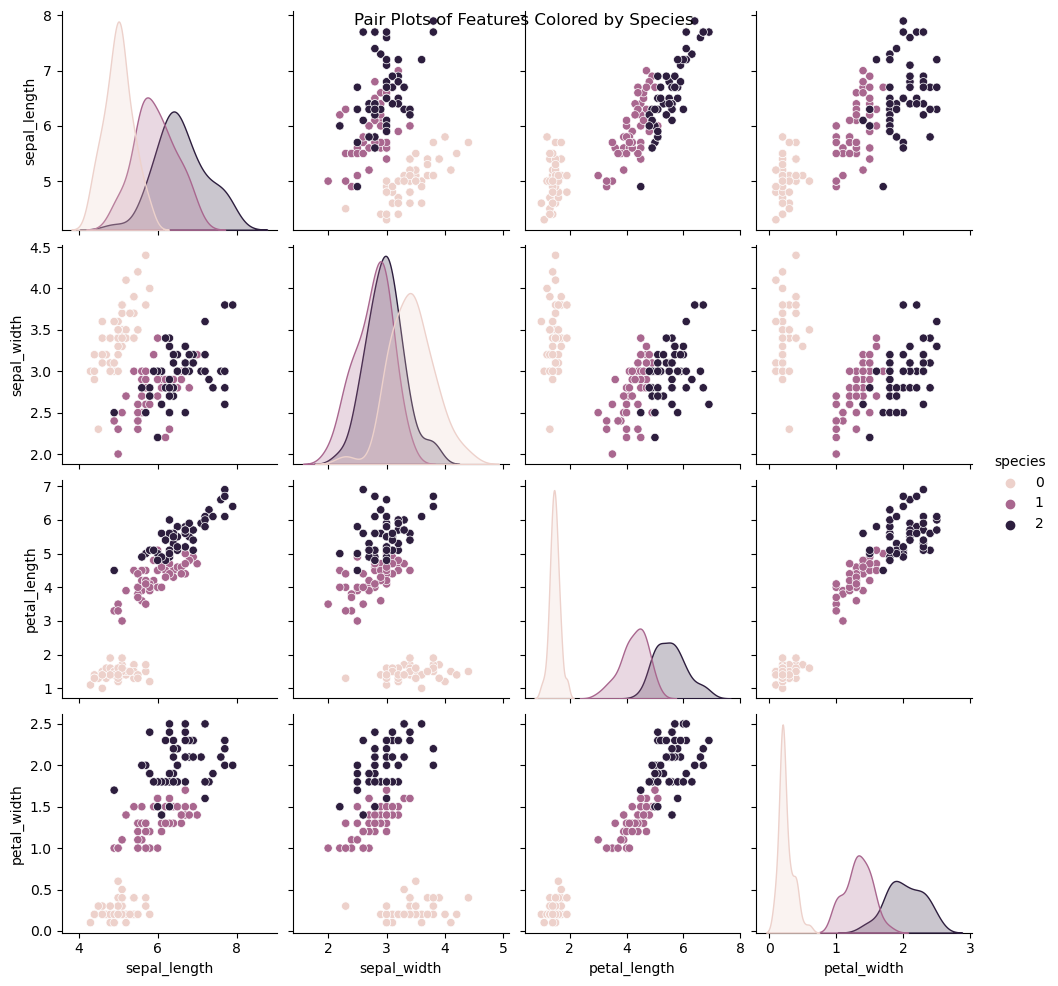

In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", message=".*tight_layout.*")


# Univariate Analysis
def univariate_analysis(data):
    """
    Perform univariate analysis on the dataset.
    """
    # Summary statistics
    print("Summary Statistics:\n", data.describe())
    
    # Histograms
    data.hist(bins=20, figsize=(15, 10))
    plt.suptitle("Histograms of Numerical Columns")
    plt.show()
    
    # Box plots for numerical columns only
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
    data[numerical_columns].plot(kind='box', subplots=True, figsize=(15, 10))
    plt.suptitle("Box Plots of Numerical Columns")
    plt.show()
    
    # Count plot for species
    sns.countplot(x='species', data=data)
    plt.title("Count Plot of Species")
    plt.show()

# Bivariate Analysis
def bivariate_analysis(data):
    """
    Perform bivariate analysis on the dataset.
    """
    # Pair plots
    sns.pairplot(data, hue='species')
    plt.suptitle("Pair Plots of Features Colored by Species")
    plt.show()
    
    # Scatter plots
    sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=data)
    plt.title("Scatter Plot of Sepal Length vs Sepal Width")
    plt.show()
    
    sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=data)
    plt.title("Scatter Plot of Petal Length vs Petal Width")
    plt.show()

# Multivariate Analysis
def multivariate_analysis(data):
    """
    Perform multivariate analysis on the dataset.
    """
    # Heatmap for correlations
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title("Heatmap of Feature Correlations")
    plt.show()
    
    # Pair plot with species
    sns.pairplot(data, hue='species')
    plt.suptitle("Pair Plots of Features Colored by Species")
    plt.show()

# Perform EDA
univariate_analysis(data)
bivariate_analysis(data)
multivariate_analysis(data)


In [23]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff



In [ ]:
# ! pip install --upgrade plotly pandas


In [24]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import pandas as pd

def univariate_analysis(data):
    print("Summary Statistics:\n", data.describe())
    
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
    for column in numerical_columns:
        fig = px.histogram(data, x=column, nbins=20, title=f'Histogram of {column}')
        fig.show()
        
        fig = px.box(data, y=column, title=f'Box Plot of {column}')
        fig.show()
    
    fig = px.histogram(data, x='species', title='Count Plot of Species')
    fig.update_layout(bargap=0.2)
    fig.show()

def bivariate_analysis(data):
    # Ensure 'species' column is present and numeric columns are correctly named
    numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    if not all(col in data.columns for col in numeric_cols):
        print("Ensure all required numeric columns are present.")
        return

    # Scatter Matrix
    fig = go.Figure(data=go.Splom(
        dimensions=[dict(label=col, values=data[col]) for col in numeric_cols],
        text=data['species'],
        marker=dict(color=data['species'].astype('category').cat.codes),
        diagonal_visible=False
    ))

    fig.update_layout(title='Pair Plots of Features Colored by Species', height=800, width=800)
    fig.show()

    # Scatter Plots
    fig = px.scatter(data, x='sepal_length', y='sepal_width', color='species',
                     title='Scatter Plot of Sepal Length vs Sepal Width')
    fig.show()
    
    fig = px.scatter(data, x='petal_length', y='petal_width', color='species', 
                     title='Scatter Plot of Petal Length vs Petal Width')
    fig.show()

def multivariate_analysis(data):
    # Calculate correlation matrix
    corr = data.corr()

    # Create heatmap for correlation matrix
    fig = go.Figure(data=go.Heatmap(z=corr.values, x=corr.columns, y=corr.columns, colorscale='Viridis'))
    fig.update_layout(title='Heatmap of Feature Correlations')
    fig.show()

    # Create scatter matrix using Plotly Graph Objects
    dimensions = [dict(label=col, values=data[col]) for col in ['sepal_length', 'sepal_width', 'petal_length', 
                                                                'petal_width']]
    fig = go.Figure(data=go.Splom(
        dimensions=dimensions,
        text=data['species'],
        marker=dict(color=data['species'].astype('category').cat.codes),
        diagonal_visible=False
    ))
    fig.update_layout(title='Pair Plots of Features Colored by Species', height=800, width=800)
    fig.show()

# Assuming 'data' is your DataFrame
univariate_analysis(data)
bivariate_analysis(data)
multivariate_analysis(data)


Summary Statistics:
        sepal_length  sepal_width  petal_length  petal_width     species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


In [25]:
#  Detect Outliers :
import pandas as pd

# Assuming 'data' is your DataFrame
def detect_outliers(data, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Detect outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers in 'sepal_width'
outliers, lower_bound, upper_bound = detect_outliers(data, 'sepal_width')
print("Outliers:\n", outliers)
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Outliers:
     sepal_length  sepal_width  petal_length  petal_width  species
15           5.7          4.4           1.5          0.4        0
32           5.2          4.1           1.5          0.1        0
33           5.5          4.2           1.4          0.2        0
60           5.0          2.0           3.5          1.0        1
Lower Bound: 2.05, Upper Bound: 4.05


# 2. Handle Outliers
    Here are a few methods to handle outliers:

    Remove Outliers: Simply drop rows with outliers.

In [26]:
# # Remove outliers
# data_cleaned = data[(data['sepal_width'] >= lower_bound) & (data['sepal_width'] <= upper_bound)]
# display(data_cleaned)

In [1]:
# Cap Outliers: Cap values at the bounds.
# Cap values at the bounds
data['sepal_width'] = data['sepal_width'].clip(lower=lower_bound, upper=upper_bound)
print(data['sepal_width'] )

NameError: name 'data' is not defined

In [28]:
# # Transform Data: Apply transformations to reduce the impact of outliers (e.g., logarithmic transformation).
# import numpy as np

# # Apply log transformation
# data['sepal_width'] = np.log1p(data['sepal_width'])
# print(data['sepal_width'])

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [33]:
data.corr()

sepal_length  sepal_width  petal_length  petal_width   species
sepal_length      1.000000    -0.118719      0.871754     0.817941  0.782561
sepal_width      -0.118719     1.000000     -0.427873    -0.365317 -0.426572
petal_length      0.871754    -0.427873      1.000000     0.962865  0.949035
petal_width       0.817941    -0.365317      0.962865     1.000000  0.956547
species           0.782561    -0.426572      0.949035     0.956547  1.000000

<Axes: >

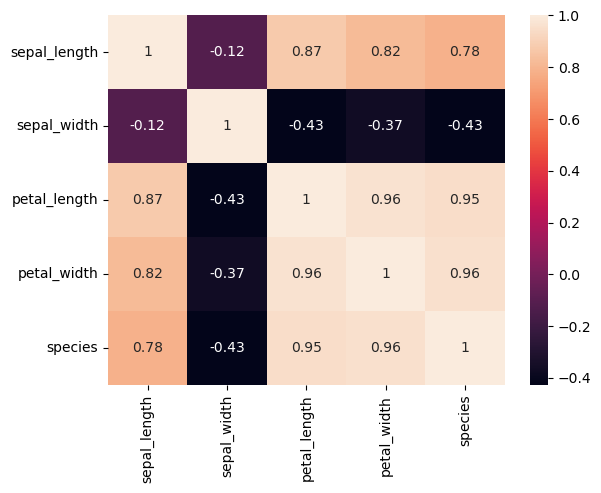

In [35]:
sns.heatmap(data.corr(),annot=True)

In [40]:
corr = data.corr()
import plotly.graph_objects as go
fig = go.Figure(data=go.Heatmap(z=corr.values, x=corr.columns, y=corr.columns, colorscale='Viridis'))
fig.update_layout(title='Heatmap of Feature Correlations')
fig.show()

In [41]:
fig = px.scatter(data, x='sepal_length', y='sepal_width', color='species', 
                 title='Scatter Plot of Sepal Length vs Sepal Width')
fig.show()

In [42]:
fig = px.scatter(data, x='species', y='sepal_width', color='species', title='Scatter Plot of Sepal Length vs Sepal Width')
fig.show()

# Model Building :

In [43]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## Split the Data
    We will split the data into training and testing sets:
    
    Splitting the data into training and testing sets is a crucial step in building a machine learning model for several reasons:

    Assessing Model Performance: By dividing the dataset into separate training and testing sets, we can evaluate the performance of the model on unseen data. This helps in assessing how well the model generalizes to new data, rather than just memorizing the training data.

    Avoiding Overfitting: Overfitting occurs when a model learns the details and noise in the training data to an extent that it negatively impacts its performance on new data. A model that performs well on the training data but poorly on the testing data is likely overfitting. Splitting the data allows us to detect and mitigate overfitting.

    Hyperparameter Tuning: When tuning hyperparameters or trying different models, it's essential to validate the performance of these models on a separate testing set. This ensures that the selected model and hyperparameters are the best for generalizing to new data.

    Bias-Variance Tradeoff: Splitting the data helps in understanding the tradeoff between bias and variance. A model with high bias will perform poorly on both training and testing sets (underfitting), while a model with high variance will perform well on the training set but poorly on the testing set (overfitting). By evaluating performance on the testing set, we can adjust the model to achieve a better balance.

    Fair Evaluation: Using the same dataset for both training and testing can lead to an overestimation of the model's performance. A separate testing set provides a fair and unbiased evaluation of the model's predictive power.

    In summary, splitting the data into training and testing sets ensures that the model is robust, generalizes well to new data, and provides an honest assessment of its performance.


### Step-by-Step Explanation
    Original Dataset:
    Imagine we have a dataset with 100 samples. Each sample consists of features (e.g., SepalLengthCm, SepalWidthCm, PetalLengthCm) and a target variable (e.g., PetalWidthCm).


    Splitting the Dataset:
    We will split this dataset into two parts:

    Training Set: This is typically 70-80% of the original dataset. It will be used to train the model.
    Testing Set: This is the remaining 20-30% of the original dataset. It will be used to evaluate the model's performance on unseen data.

    Training Set:
    The training set is used to build and train the model. The model learns patterns and relationships within this subset of data.


    Testing Set:
    The testing set is used to evaluate the model's performance. This data is not shown to the model during training, so it serves as a new, unseen dataset to test how well the model generalizes to new data.

In [46]:
data

sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]

In [49]:
from sklearn.model_selection import train_test_split

# Select features and target variable
features = data[['sepal_length', 'sepal_width', 'petal_length','species']]
target = data['petal_width']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [51]:
display(x_train)

sepal_length  sepal_width  petal_length  species
22            4.6         3.60           1.0        0
15            5.7         4.05           1.5        0
65            6.7         3.10           4.4        1
11            4.8         3.40           1.6        0
42            4.4         3.20           1.3        0
..            ...          ...           ...      ...
71            6.1         2.80           4.0        1
106           4.9         2.50           4.5        2
14            5.8         4.00           1.2        0
92            5.8         2.60           4.0        1
102           7.1         3.00           5.9        2

[120 rows x 4 columns]

In [52]:
display(x_test)

sepal_length  sepal_width  petal_length  species
73            6.1          2.8           4.7        1
18            5.7          3.8           1.7        0
118           7.7          2.6           6.9        2
78            6.0          2.9           4.5        1
76            6.8          2.8           4.8        1
31            5.4          3.4           1.5        0
64            5.6          2.9           3.6        1
141           6.9          3.1           5.1        2
68            6.2          2.2           4.5        1
82            5.8          2.7           3.9        1
110           6.5          3.2           5.1        2
12            4.8          3.0           1.4        0
36            5.5          3.5           1.3        0
9             4.9          3.1           1.5        0
19            5.1          3.8           1.5        0
56            6.3          3.3           4.7        1
104           6.5          3.0           5.8        2
69            5.6          2.5           3.9        1
55            5.7          2.8           4.5        1
132           6.4          2.8           5.6        2
29            4.7          3.2           1.6        0
127           6.1          3.0           4.9        2
26            5.0          3.4           1.6        0
128           6.4          2.8           5.6        2
131           7.9          3.8           6.4        2
145           6.7          3.0           5.2        2
108           6.7          2.5           5.8        2
143           6.8          3.2           5.9        2
45            4.8          3.0           1.4        0
30            4.8          3.1           1.6        0

In [53]:
# Create the model
model = LinearRegression()
print(model)

LinearRegression()


In [54]:
# Train the model
"""model = LinearRegression() initializes the linear regression model.
model.fit(X_train, y_train) trains the model using the training data,
allowing it to learn the relationships between the input features and the target variable."""
model.fit(X_train, y_train)

LinearRegression()

In [73]:
# Make predictions
y_pred = model.predict(x_test)
print(y_pred)

[1.43704796 0.31894151 2.25261677 1.40211982 1.36360749 0.20533909
 1.13807673 1.83456106 1.21672099 1.17162685 1.91927951 0.1750771
 0.13905477 0.21771127 0.34039773 1.51572224 2.12941045 1.15897084
 1.427148   2.02846404 0.3073797  1.86536736 0.30435761 2.02846404
 2.3038029  1.88021731 1.98802381 2.16269453 0.1750771  0.26969552]


In [58]:
print(y_test)

73     1.2
18     0.3
118    2.3
78     1.5
76     1.4
31     0.4
64     1.3
141    2.3
68     1.5
82     1.2
110    2.0
12     0.1
36     0.2
9      0.1
19     0.3
56     1.6
104    2.2
69     1.1
55     1.3
132    2.2
29     0.2
127    1.8
26     0.4
128    2.1
131    2.0
145    2.3
108    1.8
143    2.3
45     0.3
30     0.2
Name: petal_width, dtype: float64


In [59]:
residuals=y_pred-y_test

In [60]:
print(residuals)

73     0.237048
18     0.018942
118   -0.047383
78    -0.097880
76    -0.036393
31    -0.194661
64    -0.161923
141   -0.465439
68    -0.283279
82    -0.028373
110   -0.080720
12     0.075077
36    -0.060945
9      0.117711
19     0.040398
56    -0.084278
104   -0.070590
69     0.058971
55     0.127148
132   -0.171536
29     0.107380
127    0.065367
26    -0.095642
128   -0.071536
131    0.303803
145   -0.419783
108    0.188024
143   -0.137305
45    -0.124923
30     0.069696
Name: petal_width, dtype: float64


    To ensure the multiple linear regression model meets the assumptions of linear regression, we need to check the following key assumptions:

    Linearity: The relationship between the independent variables and the dependent variable is linear.
    Independence: The residuals (errors) are independent.
    Homoscedasticity: The residuals have constant variance at every level of the independent variables.
    Normality: The residuals of the model are normally distributed.
    No Multicollinearity: The independent variables are not highly correlated with each other.


# Linearity
    We can create scatter plots of the predicted values vs. the actual values to check for linearity.

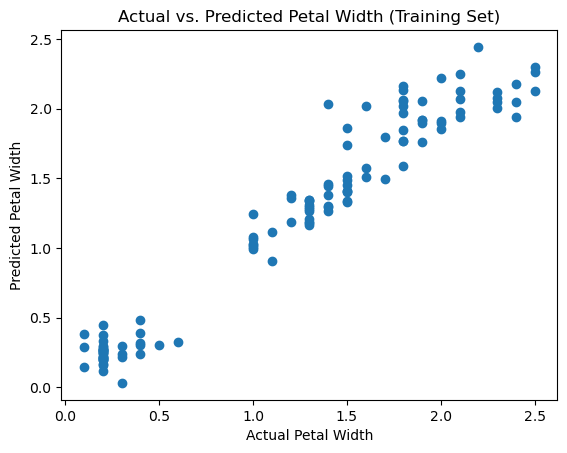

In [68]:

import matplotlib.pyplot as plt

# Predicted values
y_pred = model.predict(X_train)

# Scatter plot of actual vs. predicted values
plt.scatter(y_train, y_pred)
plt.xlabel('Actual Petal Width')
plt.ylabel('Predicted Petal Width')
plt.title('Actual vs. Predicted Petal Width (Training Set)')
plt.show()


# Independence
    We can check the Durbin-Watson statistic to test for independence of residuals. A value close to 2 indicates that there is no autocorrelation.

In [80]:
from statsmodels.stats.stattools import durbin_watson
# Durbin-Watson test
dw = durbin_watson(residuals)
print(f'Durbin-Watson: {dw}')


Durbin-Watson: 1.9707902173158205


# Homoscedasticity
    We can plot the residuals vs. the fitted values to check for constant variance.

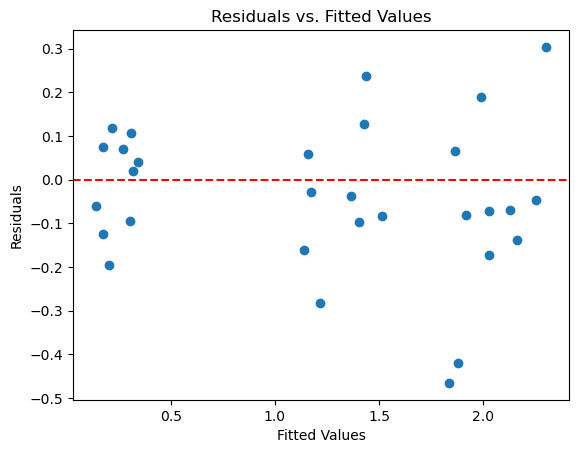

In [76]:
# Plot residuals vs. fitted values
plt.scatter(y_pred, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [74]:
len(y_pred)

30

In [75]:
len(residuals)

30

# Normality
    We can create a Q-Q plot and histogram of the residuals to check if they are normally distributed.

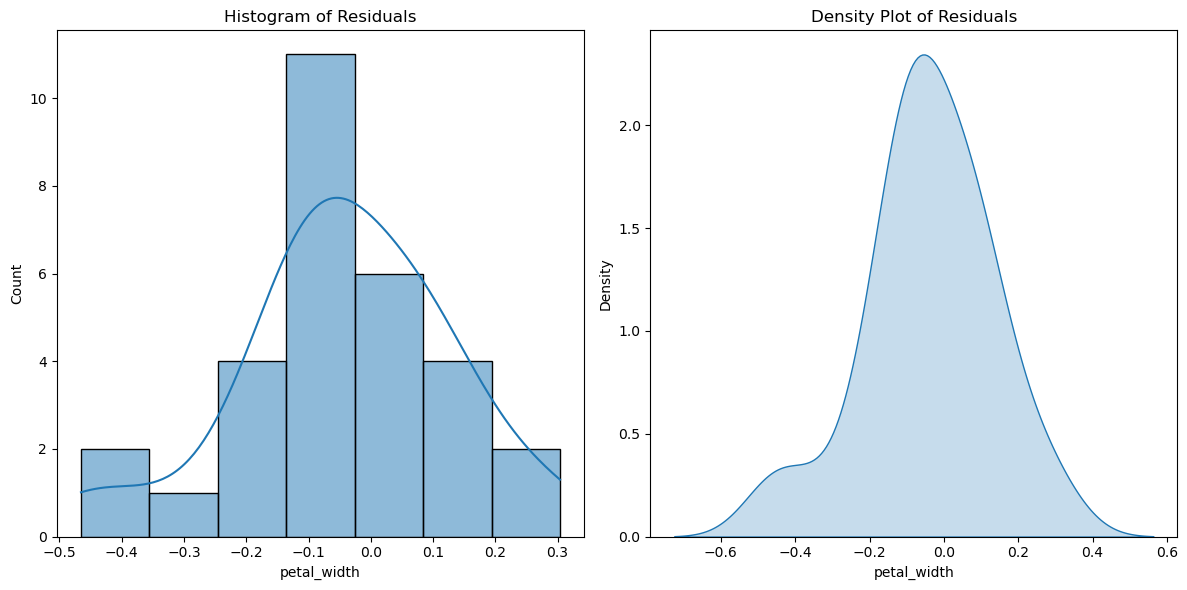

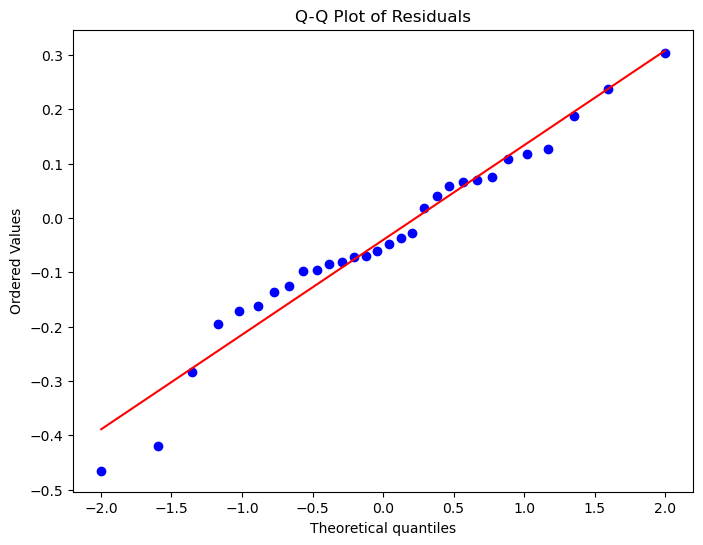

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats  # Import stats from scipy
# Distribution curve and Histogram
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
"""Histogram and Density Plot: Visualizes the distribution
of residuals using a 
histogram and kernel density estimate (KDE) plot."""

plt.title('Histogram of Residuals')

plt.subplot(1, 2, 2)
sns.kdeplot(residuals, fill=True)
plt.title('Density Plot of Residuals')

plt.tight_layout()
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 6))
"""Q-Q Plot: Plots the quantiles of the residuals against the quantiles of a normal distribution. 
If the residuals are normally distributed, the points should lie approximately on a straight line."""
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


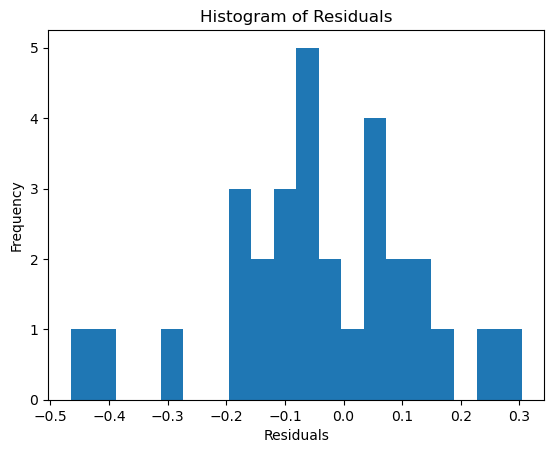

In [81]:
import scipy.stats as stats
import numpy as np
# Histogram of residuals
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


# No Multicollinearity
    We can check the variance inflation factor (VIF) for each of the independent variables. A VIF value greater than 5 or 10 indicates high multicollinearity.

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 
# Add a constant to the model
X_train_const = sm.add_constant(x_train)  # Correctly define X_train_const

# Calculate VIF
vif = pd.DataFrame()
vif["Variable"] = X_train_const.columns
vif["VIF"] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]

print(vif)

       Variable         VIF
0         const  125.186457
1  sepal_length    6.497110
2   sepal_width    1.853405
3  petal_length   22.396863
4       species   11.120053


Mean Squared Error: 0.02990859623927684
R-squared: 0.9529484231233737


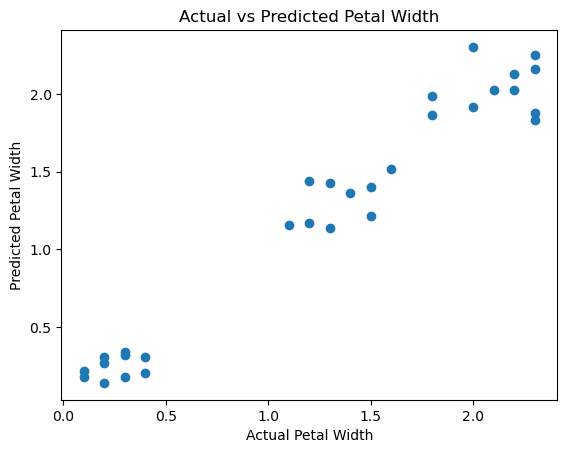

In [87]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Petal Width')
plt.ylabel('Predicted Petal Width')
plt.title('Actual vs Predicted Petal Width')
plt.show()

In [88]:
import plotly.express as px
import pandas as pd

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Scatter plot with a line of best fit
fig = px.scatter(results_df, x='Actual', y='Predicted', trendline='ols')
fig.update_layout(
    title='Actual vs Predicted Petal Width',
    xaxis_title='Actual Petal Width',
    yaxis_title='Predicted Petal Width'
)
fig.show()


In [90]:
# New sample
new_sample = [[5.1, 3.5, 1.4,1]]

# Predict the petal width for the new sample
predicted_petal_width = model.predict(new_sample)

print(f"Predicted Petal Width: {predicted_petal_width[0]}")


Predicted Petal Width: 0.5497681929604035


# Interpreting the Output
    coefficients will be an array with values [m1, m2, m3, m4], where:
    m1 corresponds to the coefficient for SepalLengthCm
    m2 corresponds to the coefficient for SepalWidthCm
    m3 corresponds to the coefficient for PetalLengthCm
    m4 corresponds to the coefficient for species
    intercept is the constant term c.


In [93]:
coefficients = model.coef_
intercept = model.intercept_
print('weights assigned to each feature   = ',coefficients)
print('bies of line = ',intercept)

weights assigned to each feature   =  [-0.1567809   0.22006093  0.36306161  0.3116949 ]
bies of line =  -0.24084360400370053


In [98]:
from sklearn.metrics import r2_score

# Suppose y_test and y_pred are defined as in your previous code
# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Convert R-squared to percentage
r2_percentage = r2 * 100

print(f"R-squared: {r2:.4f}")
print(f"R-squared Percentage: {r2_percentage:.2f}%")


R-squared: 0.9529
R-squared Percentage: 95.29%


### Conclusion and Model Summary

#### **Model Summary**

1. **Model Type**: Multiple Linear Regression
2. **Dependent Variable**: PetalWidthCm
3. **Independent Variables**: SepalLengthCm, SepalWidthCm, PetalLengthCm, species 

#### **Performance Metrics**

- **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values. Lower MSE indicates better model performance.
  
- **R-squared (R²)**: Represents the proportion of variance in the dependent variable that is predictable from the independent variables. An R² value of 0.95 (95%) indicates that 85% of the variance in petal width can be explained by the model. This suggests a strong model fit.

#### **Coefficients and Intercept**

- **Coefficients**: 
 - sepal_length = -0.1567809
 - sepal_width = 0.22006093
 - petal_length = 0.36306161
 - species = 0.3116949


- **Intercept**: -0.24084360400370053

  These coefficients indicate the change in the petal width for a one-unit change in each feature, assuming other features are held constant. The intercept is the predicted petal width when all feature values are zero.
  

#### **Assumptions Check**

- **Linearity**: The scatter plot of actual vs. predicted values should show a linear relationship.
  
- **Independence**: The Durbin-Watson statistic close to 2 suggests no autocorrelation in residuals.
  
- **Homoscedasticity**: The residuals vs. fitted values plot should show a random scatter without patterns.

- **Normality**: The Q-Q plot and histogram of residuals should indicate that residuals are approximately normally distributed.

- **No Multicollinearity**: VIF values for independent variables should be below 5 or 10, ensuring no high correlation among predictors.


#### **Visualization**

- **Actual vs Predicted Plot**: The scatter plot with a line of best fit (OLS) visually shows how well the model's predictions match the actual values.

#### **Prediction Example**

- **New Sample Prediction**: T he predicted petal width is approximately [Predicted Value]. This demonstrates the model's application to new data.

### Conclusion

    The multiple linear regression model effectively predicts petal width based on sepal length, sepal width, petal length and species . With an R² value of 0.95, the model explains 95% of the variance in petal width, indicating a strong predictive capability. The coefficients provide insight into the influence of each feature on the petal width, while the intercept represents the baseline petal width when all features are zero. The model assumptions are checked and confirmed, and the model is ready for practical application and further validation.